<img src="estratek_logo.jpg" style="width:543px;height:190px"/>

# TensorFlow Project
## Loan Payback Prediction

#### by Omar Arias

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

## NOTE: Do not download the full zip from the link! We provide a special version of this file that has some extra feature engineering for you to do. You won't be able to follow along with the original file!

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

In [1]:
import pandas as pd

In [2]:
data_info = pd.read_csv('./DATA/lending_club_info.csv',index_col='LoanStatNew')

In [3]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [4]:
# Return the description of the specified feature
def feat_info(col_name):
    if (col_name in data_info.index.to_list()):
        print(data_info.loc[col_name]['Description'])
    else:
        print('ERROR: Unknown feature.')

In [5]:
feat_info('mort_acc')

Number of mortgage accounts.


In [6]:
# Fucntion to list how many missing values of each column
def print_missing_values(df):
    missing = df.isna().sum()/len(df)*100
    missing.name = "Missing Values"
    print('--- Missing values ---')
    print(missing)

In [7]:
# Checks extensively all the column element types
def type_checker(df, col_name):
    is_same_type = True
    for i in range(len(df)):
        if type(df.loc[i, col_name]) != type(df.loc[0, col_name]):
            is_same_type = False
            break

    if is_same_type:
        print("All cells in '" + col_name + "' are the same type.")
    print(df[col_name].dtypes)
    

In [8]:
# Show all categorical features with the number of categories of each one

def print_categorical_features(df):
    # Select columns with object dtype
    object_columns = df.select_dtypes(include="object")

    # Iterate over columns and print name and number of unique values
    for col in object_columns:
        num_unique_values = df[col].nunique()
        print(f"Column: {col}: {num_unique_values}")

### Load Initial Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

### Get the Data

In [10]:

df = pd.read_csv('./DATA/lending_club_loan_two.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [12]:
# Total number of examples
len(df)

396030

In [13]:
# Determine the output variable
df['loan_status'].describe()

count         396030
unique             2
top       Fully Paid
freq          318357
Name: loan_status, dtype: object

* Look a nice data table visualization using skimpy

In [14]:
# !pip install skimpy
import skimpy

skimpy.skim(df)


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 396030 │ │ string      │ 15    │                                                          │
│ │ Number of columns │ 27     │ │ float64     │ 12    │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name            ┃ NA     ┃ NA %  ┃ mean   ┃ sd     ┃ p0  ┃ p25   ┃ p50   ┃ p75   ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ loan_amnt              │      0 │     0 │  14000 │   8400 │ 500 │  8000 │ 12000 │ 20000 │   40000 │ ▅▇▆▃▁▁ │  │
│ │ int_rate               │      0 │     0 │     14 │    4.5 │ 5.3 │    10 │    13 │    16 │      31 │ ▅▇▇▃▁  │  │
│ │ installment            │      0 │     0 │    430 │    250 │  16 │   250 │   380 │   570 │    1500 │ ▅▇▃▁▁  │  │
│ │ annual_inc             │      0 │     0 │  74000 │  62000 │   0 │ 45000 │ 64000 │ 90000 │ 8700000 │   ▇    │  │
│ │ dti                    │      0 │     0 │     17 │     18 │   0 │    11 │    17 │    23 │   10000 │   ▇    │  │
│ │ open_acc               │      0 │     0 │     11 │    5.1 │   0 │     8 │    10 │    14 │      90 │   ▇▂   │  │
│ │ pub_rec                │      0 │     0 │   0.18 │   0.53 │   0 │     0 │     0 │     0 │      86 │   ▇    │  │
│ │ revol_bal              │      0 │     0 │  16000 │  21000 │   0 │  6000 │ 11000 │ 20000 │ 1700000 │   ▇    │  │
│ │ revol_util             │    276 │  0.07 │     54 │     24 │   0 │    36 │    55 │    73 │     890 │   ▇    │  │
│ │ total_acc              │      0 │     0 │     25 │     12 │   2 │    17 │    24 │    32 │     150 │   ▇▅   │  │
│ │ mort_acc               │  37795 │  9.54 │    1.8 │    2.1 │   0 │     0 │     1 │     3 │      34 │   ▇▁   │  │
│ │ pub_rec_bankruptcies   │    535 │  0.14 │   0.12 │   0.36 │   0 │     0 │     0 │     0 │       8 │   ▇    │  │
│ └────────────────────────┴────────┴───────┴────────┴────────┴─────┴───────┴───────┴───────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ NA         ┃ NA %     ┃ words per row           ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ term                               │          0 │        0 │                       3 │             1188090 │  │
│ │ grade                              │          0 │        0 │                       1 │              396030 │  │
│ │ sub_grade                          │          0 │        0 │                       1 │              396030 │  │
│ │ emp_title                          │      22927 │     5.79 │                     2.2 │              860939 │  │
│ │ emp_length                         │      18301 │     4.62 │                       2 │              787183 │  │
│ │ home_ownership                     │          0 │   

---
---
# Section 1: Exploratory Data Analysis

**OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data**

----

<AxesSubplot:xlabel='loan_status', ylabel='count'>

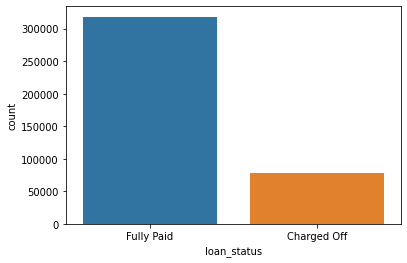

In [15]:
# See how unbalanced are the output labels
sns.countplot(x='loan_status',data=df, hue='loan_status')

In [16]:
# See how unbalanced are the output labels
df['loan_status'].value_counts()

loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64

In [17]:
# Correlation bwtween the data continuous features
df.select_dtypes(include="number").corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<AxesSubplot:>

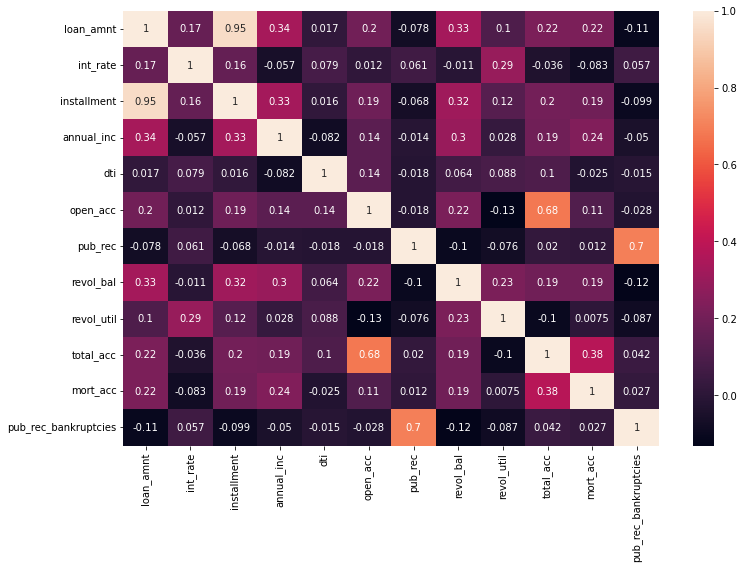

In [18]:
# Show the correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include="number").corr(), annot=True)

* Conclusions: 
   - Installment is highly correlated to Loan Amount.  Maybe we can get rid of it.

<AxesSubplot:xlabel='loan_amnt', ylabel='installment'>

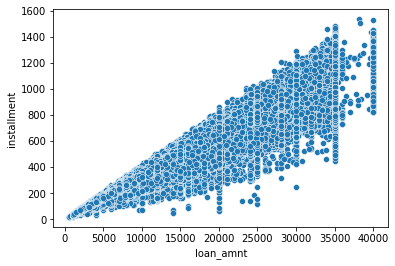

In [19]:
sns.scatterplot(data=df, x='loan_amnt', y='installment')

* Conclusion: It makes sense this high correlation. Installments are usually a fraction of the loan amount.  We can get rid of the installment feature

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

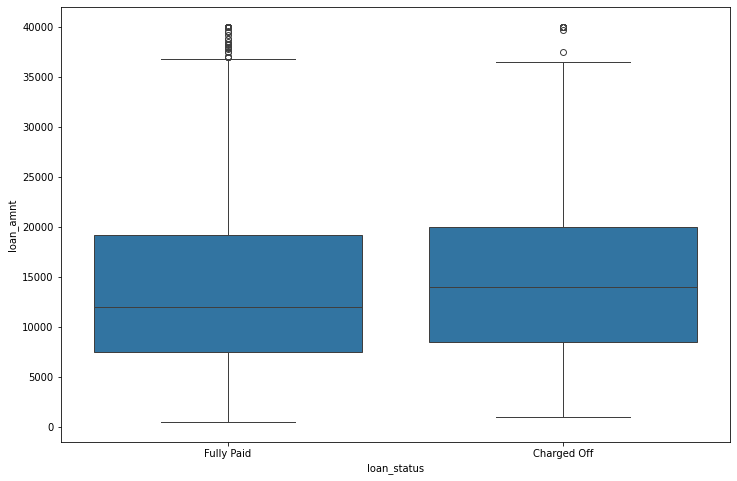

In [20]:
# Let see if the loan_status is impacted by the loan amount
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='loan_status', y='loan_amnt')

In [21]:
# Calculaate the mean of loan amount of each loan status category
df[['loan_status', 'loan_amnt']].groupby('loan_status').mean()['loan_amnt']

loan_status
Charged Off    15126.300967
Fully Paid     13866.878771
Name: loan_amnt, dtype: float64

In [22]:
# Let's explore Grade and Subgrade columns
df['grade'].value_counts()

grade
B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: count, dtype: int64

In [23]:
df['sub_grade'].value_counts()

sub_grade
B3    26655
B4    25601
C1    23662
C2    22580
B2    22495
B5    22085
C3    21221
C4    20280
B1    19182
A5    18526
C5    18244
D1    15993
A4    15789
D2    13951
D3    12223
D4    11657
A3    10576
A1     9729
D5     9700
A2     9567
E1     7917
E2     7431
E3     6207
E4     5361
E5     4572
F1     3536
F2     2766
F3     2286
F4     1787
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
Name: count, dtype: int64

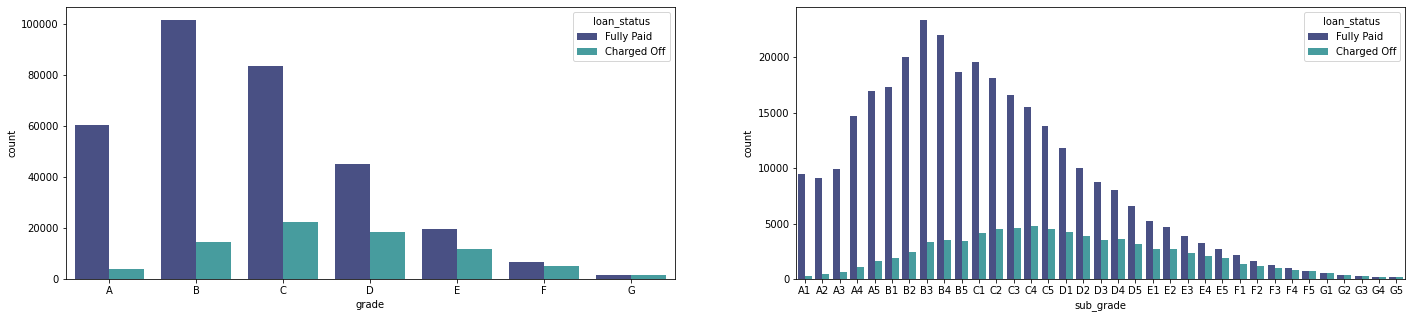

In [24]:
palette = sns.color_palette('mako', n_colors=2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 5))


ordered_grade = sorted(df["grade"].unique())
ordered_subgrade = sorted(df["sub_grade"].unique())

sns.countplot(data=df, x='grade', ax=ax1, order=ordered_grade, hue='loan_status', palette=palette)
sns.countplot(data=df, x='sub_grade', ax=ax2, order=ordered_subgrade, hue='loan_status',  palette=palette)
# plt.tight_layout()
plt.show()

* Conclusion: It looks like F and G grades loans are not paid back quite often

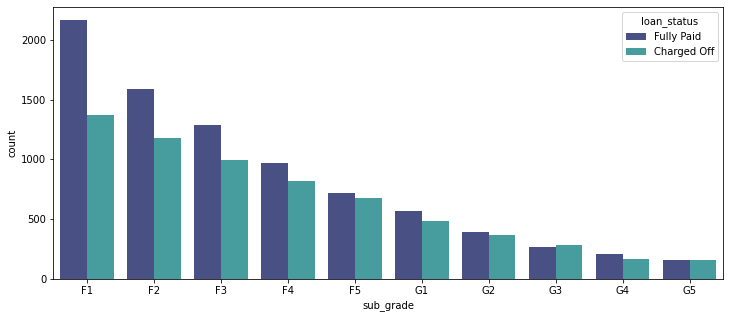

In [25]:
# Take a closer look at those bad subgrades

palette = sns.color_palette('mako', n_colors=2)

ordered_subgrade = sorted(df[df['grade'].isin(["F", "G"])]["sub_grade"].unique())
plt.figure(figsize=(12,5))
sns.countplot(data=df[df['grade'].isin(["F", "G"])], x='sub_grade', order=ordered_subgrade, hue='loan_status',  palette=palette)
# plt.tight_layout()
plt.show()

In [26]:
# Create a column with the loan_status hot-one encoded
df['loan_repaid'] = np.where(df["loan_status"] == "Fully Paid", 1, 0)

In [27]:
df[['loan_status','loan_repaid']]

,loan_status,loan_repaid
0,Fully Paid,1
1,Fully Paid,1
2,Fully Paid,1
3,Fully Paid,1
4,Charged Off,0
...,...,...
396025,Fully Paid,1
396026,Fully Paid,1
396027,Fully Paid,1
396028,Fully Paid,1


In [28]:
# Let's see how the other numerical columns correlate with 'loan_repaid'
df.select_dtypes(include="number").corr()['loan_repaid'].sort_values()


int_rate               -0.247758
revol_util             -0.082373
dti                    -0.062413
loan_amnt              -0.059836
installment            -0.041082
open_acc               -0.028012
pub_rec                -0.019933
pub_rec_bankruptcies   -0.009383
revol_bal               0.010892
total_acc               0.017893
annual_inc              0.053432
mort_acc                0.073111
loan_repaid             1.000000
Name: loan_repaid, dtype: float64

---
---
# Section 2: Data PreProcessing

**Section Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**



### Missing Data

**Let's explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

In [29]:
len(df)

396030

In [30]:
print_missing_values(df)

--- Missing values ---
loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
Name: Missing Values, dtype: float64


* Only columns: emp_title, emp_length, title, revol_util, mort_acc, pub_rec_bankruptcies have missing values.

In [31]:
df.isna()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396026,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396027,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396028,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### emp_title and emp_length

* Let's take care of emp_title and emp_length

In [32]:
print(df['emp_title'].value_counts())
print(df['emp_length'].value_counts())

emp_title
Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: count, Length: 173105, dtype: int64
emp_length
10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: count, dtype: int64


In [33]:
# Count of every category of emp_title
df['emp_title'].value_counts()


emp_title
Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: count, Length: 173105, dtype: int64

* Realistically there are too many unique job titles to try to convert this to a dummy variable feature. The column emp_title will be removed

In [34]:
# Remove emp_title column
df = df.drop('emp_title', axis=1)

* Let's take care of emp_length

In [35]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [36]:
df.emp_length.value_counts

<bound method IndexOpsMixin.value_counts of 0         10+ years
1           4 years
2          < 1 year
3           6 years
4           9 years
            ...    
396025      2 years
396026      5 years
396027    10+ years
396028    10+ years
396029    10+ years
Name: emp_length, Length: 396030, dtype: object>

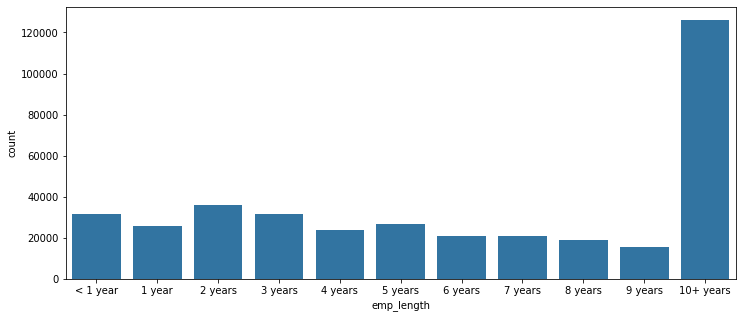

In [37]:
# Take a closer look at emp_length

palette = sns.color_palette('mako', n_colors=2)
ordered_emplength = [ '< 1 year',
                      '1 year',
                      '2 years',
                      '3 years',
                      '4 years',
                      '5 years',
                      '6 years',
                      '7 years',
                      '8 years',
                      '9 years',
                      '10+ years']
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='emp_length', order=ordered_emplength)
# plt.tight_layout()
plt.show()

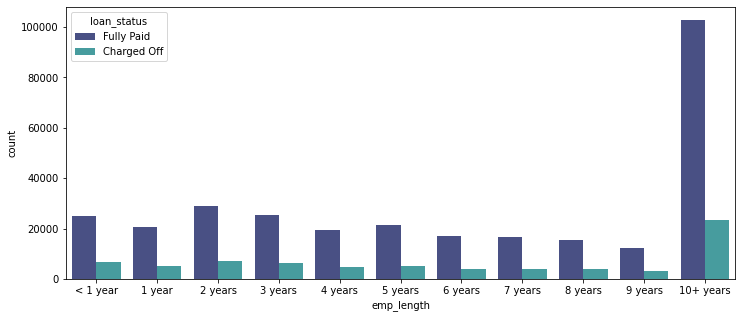

In [38]:
# Take a closer look at emp_length

palette = sns.color_palette('mako', n_colors=2)
ordered_emplength = [ '< 1 year',
                      '1 year',
                      '2 years',
                      '3 years',
                      '4 years',
                      '5 years',
                      '6 years',
                      '7 years',
                      '8 years',
                      '9 years',
                      '10+ years']
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='emp_length', order=ordered_emplength, palette=palette, hue='loan_status')
# plt.tight_layout()
plt.show()

In [39]:
# Calculte the ration emp_chargedoff/emp_repaid
emp_chargedoff = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']
emp_repaid = df[df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']
emp_len = emp_chargedoff/emp_repaid

In [40]:
emp_len

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='emp_length'>

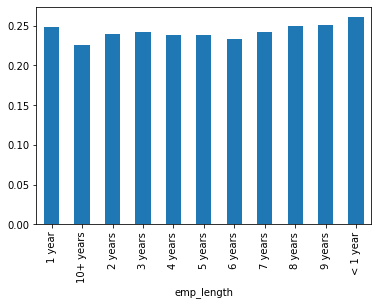

In [41]:
emp_len.plot(kind='bar')

* The percentage of chargedoff/repaid is almost the same across employment lengths. We can get rid of this feature.

In [42]:
df = df.drop('emp_length',axis=1)

#### intallment
* The same happens with installment feature

<AxesSubplot:>

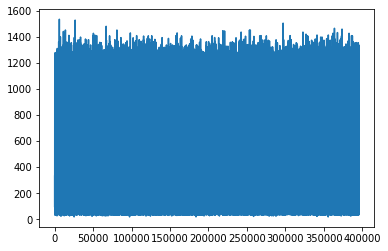

In [43]:
df['installment'].plot()

In [44]:
# Let's get rid of this useless feature
df = df.drop('installment', axis=1)

In [45]:
# Revisiting  to check missing data columns
print_missing_values(df)

--- Missing values ---
loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
Name: Missing Values, dtype: float64


#### title
* Let's check if we need the column title

In [46]:
feat_info('title')

The loan title provided by the borrower


In [47]:
feat_info('purpose')

A category provided by the borrower for the loan request. 


* The title column is simply a string subcategory/description of the purpose column. Go ahead and drop the title column.**


In [48]:
# Removing the 'title' column
df = df.drop('title',axis=1)

In [49]:
# Revisiting  to check missing data columns
print_missing_values(df)

--- Missing values ---
loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
Name: Missing Values, dtype: float64


In [50]:
feat_info('mort_acc')

Number of mortgage accounts.


<AxesSubplot:xlabel='mort_acc'>

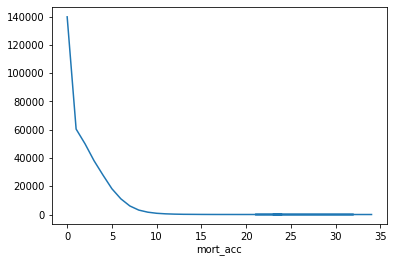

In [51]:
df['mort_acc'].value_counts().plot()

In [52]:
# Let's see how the other numerical columns correlate with 'loan_repaid'
df.select_dtypes(include="number").corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [53]:
feat_info('total_acc')

The total number of credit lines currently in the borrower's credit file


In [54]:
df['mort_acc'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 396030 entries, 0 to 396029
Series name: mort_acc
Non-Null Count   Dtype  
--------------   -----  
358235 non-null  float64
dtypes: float64(1)
memory usage: 3.0 MB


In [55]:
print("Mean of mort_acc column per total_acc")
df.groupby('total_acc').mean(['mort_acc'])

Mean of mort_acc column per total_acc


,loan_amnt,int_rate,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies,loan_repaid
total_acc,,,,,,,,,,,
2.0,6672.222222,15.801111,64277.777778,2.279444,1.611111,0.000000,2860.166667,53.527778,0.000000,0.000000,0.777778
3.0,6042.966361,15.615566,41270.753884,6.502813,2.611621,0.045872,3382.807339,49.991022,0.052023,0.015480,0.779817
4.0,7587.399031,15.069491,42426.565969,8.411963,3.324717,0.041195,4874.231826,58.477400,0.066743,0.022951,0.785945
5.0,7845.734714,14.917564,44394.098003,10.118328,3.921598,0.071499,5475.253452,56.890311,0.103289,0.041171,0.796844
6.0,8529.019843,14.651752,48470.001156,11.222542,4.511119,0.104003,6546.374957,57.812483,0.151293,0.055077,0.784126
...,...,...,...,...,...,...,...,...,...,...,...
124.0,23200.000000,17.860000,66000.000000,14.040000,43.000000,0.000000,25497.000000,75.400000,1.000000,0.000000,0.000000
129.0,25000.000000,7.890000,200000.000000,8.900000,48.000000,0.000000,27659.000000,8.300000,1.000000,0.000000,1.000000
135.0,24000.000000,15.410000,82000.000000,33.850000,57.000000,0.000000,35715.000000,50.800000,3.000000,0.000000,1.000000


* acc_avg_df is a groupby('total_acc') of df with the mean mort_acc calculated

In [56]:
print("Mean of mort_acc column per total_acc")
# Create a dataframe to calculate the mean mort_acc grouped by total_acc values
acc_avg_df = pd.DataFrame(columns=['sum', 'count'])
acc_avg_df['sum'] = df.groupby('total_acc').sum()['mort_acc']
acc_avg_df['count'] = df.groupby('total_acc').count()['mort_acc']
acc_avg_df['mean_mort_acc'] = acc_avg_df['sum'] / acc_avg_df['count']
acc_avg_df.drop(['sum', 'count'], axis=1, inplace=True)

# Let's fix the index of acc_avg_df
acc_avg_df['total_acc'] = acc_avg_df.index
acc_avg_df.reset_index(drop=True, inplace=True)


new_order = ['total_acc', 'mean_mort_acc']
acc_avg_df = acc_avg_df[new_order]


Mean of mort_acc column per total_acc


In [57]:
# How does it look?
acc_avg_df.tail(10)            

,total_acc,mean_mort_acc
108,111.0,2.0
109,115.0,8.0
110,116.0,4.5
111,117.0,0.0
112,118.0,1.0
113,124.0,1.0
114,129.0,1.0
115,135.0,3.0
116,150.0,2.0
117,151.0,0.0


In [58]:
# Function to be applied as lambda to fill mort_acc nan values
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        mean_mort = acc_avg_df[acc_avg_df['total_acc'] == total_acc]['mean_mort_acc'].values[0]
        return mean_mort
    else:
        return mort_acc

In [59]:
nan_rows = df[df['mort_acc'].isnull()]
len(nan_rows)

37795

In [60]:
nan_rows

,loan_amnt,term,int_rate,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
22,4200.0,36 months,6.99,A,A3,OWN,24000.0,Not Verified,Jun-2011,Fully Paid,...,0.0,0.0,0.0,7.0,f,INDIVIDUAL,NaN,0.0,"54395 Melissa Walks\nJenniferbury, AL 05113",1
25,6000.0,36 months,11.36,B,B5,RENT,46680.0,Not Verified,Apr-2010,Charged Off,...,0.0,4370.0,40.1,10.0,f,INDIVIDUAL,NaN,0.0,"44130 Powers Course Suite 880\nEast Preston, A...",0
32,3000.0,36 months,6.03,A,A1,OWN,64000.0,Source Verified,Oct-2011,Fully Paid,...,0.0,4912.0,13.4,18.0,f,INDIVIDUAL,NaN,0.0,"2722 Smith Branch Suite 131\nShaunbury, NH 22690",1
41,28000.0,60 months,19.91,E,E4,RENT,52000.0,Verified,Dec-2011,Charged Off,...,0.0,29178.0,87.6,16.0,f,INDIVIDUAL,NaN,0.0,"5836 Garcia Falls Apt. 525\nMatthewtown, CT 22690",0
62,5000.0,36 months,10.39,B,B4,RENT,66000.0,Not Verified,May-2008,Fully Paid,...,0.0,15807.0,20.0,17.0,f,INDIVIDUAL,NaN,0.0,USS Goodman\nFPO AE 22690,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395991,5600.0,36 months,9.63,B,B1,RENT,54000.0,Verified,Mar-2011,Fully Paid,...,0.0,2776.0,33.0,21.0,f,INDIVIDUAL,NaN,0.0,USNS Brewer\nFPO AA 29597,1
395995,10000.0,36 months,10.25,B,B2,RENT,55000.0,Not Verified,Apr-2010,Fully Paid,...,0.0,5571.0,42.2,20.0,f,INDIVIDUAL,NaN,0.0,"PSC 0897, Box 0320\nAPO AP 22690",1
396016,3000.0,36 months,5.42,A,A1,MORTGAGE,70000.0,Source Verified,Aug-2011,Fully Paid,...,0.0,4062.0,12.6,23.0,f,INDIVIDUAL,NaN,0.0,"2672 Jennifer River\nJoannemouth, AK 70466",1
396021,3200.0,36 months,5.42,A,A1,RENT,33000.0,Not Verified,Feb-2011,Fully Paid,...,0.0,3985.0,7.6,50.0,f,INDIVIDUAL,NaN,0.0,"309 John Mission\nWest Marc, NY 00813",1


In [61]:
# WATCHOUT: I takes several minutes to run 
nan_rows = df[df['mort_acc'].isnull()]
nan_rows['mort_acc'] = nan_rows.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)
df.update(nan_rows)

/var/folders/d4/fq7vg26j3cq60g4fsv7_99jc0000gn/T/ipykernel_7898/3812793434.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nan_rows['mort_acc'] = nan_rows.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)


In [62]:
# Revisiting  to check missing data columns
print_missing_values(df)

--- Missing values ---
loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
Name: Missing Values, dtype: float64


In [63]:
print('Total records', len(df))
total_recs = int((0.135091 + 0.069692)*len(df)/100)
print('Total registros a volar: ', total_recs)
print('Porcentaje de registros con valores nules: {:.4f}%'.format(100*total_recs/len(df)))



Total records 396030
Total registros a volar:  811
Porcentaje de registros con valores nules: 0.2048%


In [64]:
# Getting rid of revol_util and pub_rec_bankruptcies, as their missing values account for less than 0.3% of the total data records

# Remove the missing values
df2 = df

# Removes the rows where EITHER 'revol_util' OR 'pub_rec_bankruptcies' are None
df2 = df.dropna(subset=['revol_util','pub_rec_bankruptcies'])
print ('Eliminados = ', len(df) - len(df2))


Eliminados =  811


In [65]:
df = df2

In [66]:
# Check if there are columns with null values
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

* Ready!  We already have a clean dataset with no columns with null values

## Processing Categorical Variables and Dummy Variables



* List all the columns that are currently non-numeric. 

[Another very useful method call](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html)

In [67]:
# Show all categorical features with the number of categories of each one
print_categorical_features(df)

Column: term: 2
Column: grade: 7
Column: sub_grade: 35
Column: home_ownership: 6
Column: verification_status: 3
Column: issue_d: 112
Column: loan_status: 2
Column: purpose: 14
Column: earliest_cr_line: 684
Column: initial_list_status: 2
Column: application_type: 3
Column: address: 392898


#### * Feature: 'term'

In [68]:
feat_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


<AxesSubplot:xlabel='term', ylabel='count'>

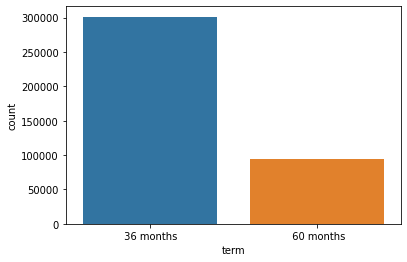

In [69]:
sns.countplot(data=df,x='term', hue='term')

In [70]:
# Convert a categorical value to a numeric value
df['term'] = df['term'].apply(lambda x: 36 if x.strip() == '36 months' else 60)
# df['term2'] = df['term'].apply(lambda x: x[:3])

In [71]:
df['term'].value_counts()

term
36    301247
60     93972
Name: count, dtype: int64

#### * Feature: 'grade'

* We already know that the 'subgrade' feature is enough.  There's no need to keep the 'grade' feature

In [72]:
df = df.drop('grade', axis=1)

In [73]:
len(df.columns)

23

#### * Feature: 'sub_grade'

*  Convert the subgrade into dummy variables. Then concatenate these new columns to the original dataframe. Remember to drop the original subgrade column and to add drop_first=True to your get_dummies call.*

In [74]:
dummies = pd.get_dummies(df['sub_grade'], prefix='sub_grade', drop_first=True)
dummies

,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,...,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5
0,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
396026,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
396027,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396028,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [75]:
df = pd.concat([df, dummies], axis=1)


In [76]:
df = df.drop('sub_grade', axis=1)

In [77]:
# Show all categorical features with the number of categories of each one
print_categorical_features(df)

Column: home_ownership: 6
Column: verification_status: 3
Column: issue_d: 112
Column: loan_status: 2
Column: purpose: 14
Column: earliest_cr_line: 684
Column: initial_list_status: 2
Column: application_type: 3
Column: address: 392898


#### * Feature: 'home_ownership'

* We already know that the 'subgrade' feature is enough.  There's no need to keep the 'grade' feature

In [78]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: count, dtype: int64

In [79]:
dummies = pd.get_dummies(df['home_ownership'], prefix='home', drop_first=True)
dummies

,home_MORTGAGE,home_NONE,home_OTHER,home_OWN,home_RENT
0,False,False,False,False,True
1,True,False,False,False,False
2,False,False,False,False,True
3,False,False,False,False,True
4,True,False,False,False,False
...,...,...,...,...,...
396025,False,False,False,False,True
396026,True,False,False,False,False
396027,False,False,False,False,True
396028,True,False,False,False,False


In [80]:
df = pd.concat([df, dummies], axis=1)
df = df.drop('home_ownership', axis=1)

In [81]:
# Show all categorical features with the number of categories of each one
print_categorical_features(df)

Column: verification_status: 3
Column: issue_d: 112
Column: loan_status: 2
Column: purpose: 14
Column: earliest_cr_line: 684
Column: initial_list_status: 2
Column: application_type: 3
Column: address: 392898


### * Features: verification_status, application_type,initial_list_status,purpose 
**TASK: Convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

In [82]:
dummies = pd.get_dummies(df['verification_status'], prefix='VS', drop_first=True)
dummies

,VS_Source Verified,VS_Verified
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True
...,...,...
396025,True,False
396026,True,False
396027,False,True
396028,False,True


In [83]:
df = pd.concat([df, dummies], axis=1)
df = df.drop('verification_status', axis=1)

In [84]:
dummies = pd.get_dummies(df['application_type'], prefix='AT', drop_first=True)
dummies

,AT_INDIVIDUAL,AT_JOINT
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False
...,...,...
396025,True,False
396026,True,False
396027,True,False
396028,True,False


In [85]:
df = pd.concat([df, dummies], axis=1)
df = df.drop('application_type', axis=1)

In [86]:
df['initial_list_status'].value_counts()

initial_list_status
f    237346
w    157873
Name: count, dtype: int64

In [87]:
feat_info('initial_list_status')

The initial listing status of the loan. Possible values are – W, F


In [88]:
dummies = pd.get_dummies(df['initial_list_status'], prefix='ILS', drop_first=True)
dummies

,ILS_w
0,True
1,False
2,False
3,False
4,False
...,...
396025,True
396026,False
396027,False
396028,False


In [89]:
df = pd.concat([df, dummies], axis=1)
df = df.drop('initial_list_status', axis=1)

In [90]:
feat_info('purpose')

A category provided by the borrower for the loan request. 


In [91]:
df['purpose'].value_counts()

purpose
debt_consolidation    234169
credit_card            82923
home_improvement       23961
other                  21059
major_purchase          8756
small_business          5656
car                     4670
medical                 4175
moving                  2842
vacation                2442
house                   2197
wedding                 1794
renewable_energy         329
educational              246
Name: count, dtype: int64

In [92]:
dummies = pd.get_dummies(df['purpose'], prefix='purpose', drop_first=True)
dummies

,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,False,True,False,False,False,False,False,False,False,False,False,False,False
396026,False,True,False,False,False,False,False,False,False,False,False,False,False
396027,False,True,False,False,False,False,False,False,False,False,False,False,False
396028,False,True,False,False,False,False,False,False,False,False,False,False,False


In [93]:
df = pd.concat([df, dummies], axis=1)
df = df.drop('purpose', axis=1)

In [94]:
# Show all categorical features with the number of categories of each one
print_categorical_features(df)

Column: issue_d: 112
Column: loan_status: 2
Column: earliest_cr_line: 684
Column: address: 392898


### * Feature: address
* Let's feature engineer a zip code column from the address in the data set. Let's create a column called 'zip_code' that extracts the zip code from the address column.

In [95]:
df['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

In [96]:
df['zip_code'] = df['address'].str[-5:]

In [97]:
df['zip_code']

0         22690
1         05113
2         05113
3         00813
4         11650
          ...  
396025    30723
396026    05113
396027    70466
396028    29597
396029    48052
Name: zip_code, Length: 395219, dtype: object

In [98]:
dummies = pd.get_dummies(df['zip_code'], prefix='zip', drop_first=True)
dummies

,zip_05113,zip_11650,zip_22690,zip_29597,zip_30723,zip_48052,zip_70466,zip_86630,zip_93700
0,False,False,True,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
396025,False,False,False,False,True,False,False,False,False
396026,True,False,False,False,False,False,False,False,False
396027,False,False,False,False,False,False,True,False,False
396028,False,False,False,True,False,False,False,False,False


In [99]:
df = pd.concat([df, dummies], axis=1)
df = df.drop('address', axis=1)
df = df.drop('zip_code', axis=1)

In [100]:
# Show all categorical features with the number of categories of each one
print_categorical_features(df)

Column: issue_d: 112
Column: loan_status: 2
Column: earliest_cr_line: 684


### * Feature: issue_d 

The month which the loan was funded


<AxesSubplot:xlabel='issue_d'>

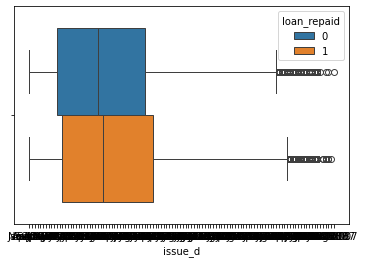

In [101]:
feat_info('issue_d')

sns.boxplot(data=df, x='issue_d', hue='loan_repaid')

* It seems to be a data that is not affecting much the outcome. We don't undertand it well. So, for now we are going to drop it.

In [102]:
df.drop('issue_d', axis=1, inplace=True)

### earliest_cr_line
* Here we extract the year from this feature using a .apply function, then convert it to a numeric feature. This new data goes to a feature column called 'earliest_cr_year'. Then we drop the earliest_cr_line feature.**

In [105]:
df['earliest_cr_line'] = df['earliest_cr_line'].str[-4:]

In [106]:
df['earliest_cr_line'] 

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_line, Length: 395219, dtype: object

In [107]:
df['earliest_cr_year'] = df['earliest_cr_line'].astype(int)

In [108]:
df.drop('earliest_cr_line', axis=1, inplace=True)

In [109]:
df['earliest_cr_year']

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_year, Length: 395219, dtype: int64

In [110]:
# Show all categorical features with the number of categories of each one
print_categorical_features(df)

Column: loan_status: 2


In [111]:
# Drop the orignal loan_status since we already have loan_repaid
df = df.drop('loan_status',axis=1)

* We are now free of categorical values

----
----

# OPTIONAL

## Grabbing a Sample for Training Time

### OPTIONAL: Use .sample() to grab a sample of the 490k+ entries to save time on training. Highly recommended for lower RAM computers or if you are not using GPU.

----
----

In [112]:
# WACHOUT!: This instruction is destructive and if we run it several times it shrinks the dataframe more & more.
df2 = df
df = df2.sample(frac=0.01,random_state=101)
print(len(df))

3952


---
---
# Section 3: Training the Deep Learning Model

**Section Goals: Train and Test Data Split, Use of Tensorflow Libraries to create a Deep Learning Model.**



## Train Test Split

* Create the train test sets

In [113]:
from sklearn.model_selection import train_test_split

In [137]:
X = df.drop('loan_repaid', axis=1).values
y = df['loan_repaid'].values


In [138]:
X.shape, y.shape

((3952, 79), (3952,))

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [140]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline

## Normalizing the Data

* Uss of MinMaxScaler to normalize the feature data X_train and X_test. 

In [199]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.fit_transform(X_test) 

## Training the Deep Learning Model

**TASK: Run the cell below to import the necessary Keras functions.**

In [197]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping



In [143]:
X_train.shape

(3161, 79)

* MODEL 1: model
* Epochs: 200
* Training with a configuration 
  - 158 - relu, 
  -  79 - relu
  -   1 - sigmoid
* No Early Stoping
* No Dropout

In [144]:
model = Sequential()

model.add(Dense(79,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(1, 'sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam')


In [145]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=200,
          validation_data=(X_test, y_test), verbose=1,
          # callbacks=[early_stop]
          )

Epoch 1/200


99/99 [==============================] - 1s 4ms/step - loss: 0.4698 - val_loss: 0.3858
Epoch 2/200
99/99 [==============================] - 0s 2ms/step - loss: 0.3533 - val_loss: 0.2981
Epoch 3/200
99/99 [==============================] - 0s 2ms/step - loss: 0.3003 - val_loss: 0.2861
Epoch 4/200
99/99 [==============================] - 0s 2ms/step - loss: 0.2808 - val_loss: 0.2769
Epoch 5/200
99/99 [==============================] - 0s 2ms/step - loss: 0.2679 - val_loss: 0.2883
Epoch 6/200
99/99 [==============================] - 0s 2ms/step - loss: 0.2593 - val_loss: 0.2781
Epoch 7/200
99/99 [==============================] - 0s 2ms/step - loss: 0.2510 - val_loss: 0.2762
Epoch 8/200
99/99 [==============================] - 0s 2ms/step - loss: 0.2434 - val_loss: 0.2718
Epoch 9/200
99/99 [==============================] - 0s 2ms/step - loss: 0.2426 - val_loss: 0.2660
Epoch 10/200
99/99 [==============================] - 0s 2ms/step - loss: 0.2349 - val_loss: 0.2752
Epoch 11/200
99/99 [=

---
---
# Section 4: Model Evaluation

**Section Goals: Collect metrics about the training process, display them and calculate the performance metrics (accuracy, f1-score, classification report and confussion matrix), so we can evaluate how good the model is. **



<AxesSubplot:>

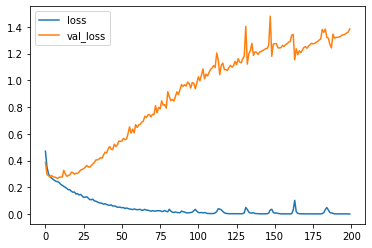

In [146]:

model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [175]:
predictions_prob = model.predict(X_test)


# Convert to the probability predicitons_prob vector to binary predictions to compare to y_test
threshold = 0.5
predictions = (predictions_prob >= threshold).astype(int)
predictions = predictions.astype(int)
predictions = predictions.flatten()


25/25 [==============================] - 0s 2ms/step


In [176]:
type(y_test)

numpy.ndarray

In [206]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, f1_score

In [178]:
len(y_test), len(predictions)

(791, 791)

In [ ]:
print(y_test)
print(predictions)

In [180]:
# https://en.wikipedia.org/wiki/Precision_and_recall
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.64      0.52      0.57       152
           1       0.89      0.93      0.91       639

    accuracy                           0.85       791
   macro avg       0.77      0.73      0.74       791
weighted avg       0.84      0.85      0.85       791



In [181]:
print(confusion_matrix(y_test,predictions))

[[ 79  73]
 [ 44 595]]


In [184]:
print(accuracy_score(y_test, predictions))

0.8520859671302149


---
---
# Section 5: Automated Model Comparison

**Section Goals: In this section we are going to automate the model performance comparison.  First, we load an array with all the hyperparameters combinations to fit as many models as desired. **


## Functions that automate all the process

In [1]:
import time

# Prints model params...
def print_model_params(params):
        # Create a DataFrame with the data:
    data = {
        "Model Name": params['model_name'],
        "Nodes in Layer 1": params['nodes_layer1'],
        "Nodes in Layer 2": params['nodes_layer2'],
        "Dropout Rate": params['dropout_rate'],
        "Early Stop Patience": params['early_stop_patience'],
        "Epochs": params['epochs']
    }
    df = pd.DataFrame(data, index=[0])  # Create a single-row DataFrame

    # Print the DataFrame as a table:
    print('Training parameters:')
    print(df.to_string())
    print('\n')
    

def run_model_comparison(X, y, model_params_array, test_size=0.2, verbose=1):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
    
    # Scale transformations
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train) 
    X_test = scaler.fit_transform(X_test) 
    
    num_models = len(model_params_array)
    results_df = pd.DataFrame(columns=['Model Name', 'EarlySt', 'Dropout', 'Epochs', 'Train Time', 'Accuracy', 'F1-Score'])
    model_loss = []
    
    for i in range(num_models):
        # Start timer...
        start_time = time.time()
        
        # Get the current model params
        model_name = model_params_array[i]["model_name"]
        nodes_layer1 = model_params_array[i]["nodes_layer1"]
        nodes_layer2 = model_params_array[i]["nodes_layer2"]
        dropout_rate = model_params_array[i]["dropout_rate"]
        early_stop_patience = model_params_array[i]["early_stop_patience"]
        epochs = model_params_array[i]["epochs"]
        
        # Prints the current params
        print (i, '. MODEL: ', model_name)

        print_model_params(model_params_array[i])

        
        # Current model setup -------------------------       
        model = Sequential()
        
        # input layer
        model.add(Dense(nodes_layer1,activation='relu'))
        if dropout_rate is not None:
            model.add(Dropout(dropout_rate))
        model.add(Dense(nodes_layer2,activation='relu'))
        if dropout_rate is not None:
            model.add(Dropout(dropout_rate))
        # output layer
        model.add(Dense(1, 'sigmoid'))
        model.compile(loss='binary_crossentropy', optimizer='adam')
        
        # Model fit...
        print('Fitting model ', model_name,'.  Grab a coffee cup...')
        if early_stop_patience is None:
            model.fit(x=X_train, 
            y=y_train, 
            epochs=epochs,
            validation_data=(X_test, y_test), verbose=verbose,
            # callbacks=[early_stop]
            )
        else:
            early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
            model.fit(x=X_train, 
            y=y_train, 
            epochs=epochs,
            validation_data=(X_test, y_test), verbose=verbose,
            callbacks=[early_stop]
            )
        
        # Model evaluation -------------------------------
        model_loss.append(pd.DataFrame(model.history.history))
            
        # Model predictions   --------------------------------
        predictions_prob = model.predict(X_test)
        # Convert to the probability predicitons_prob vector to binary predictions to compare to y_test
        threshold = 0.5
        predictions = (predictions_prob >= threshold).astype(int)
        predictions = predictions.astype(int)
        predictions = predictions.flatten()
            
    

        # Gettin the outcome metrics
        print('\nModel: ', model_name)
        # print(classification_report(y_test,predictions))
        acc_score = accuracy_score(y_test, predictions)
        f1= f1_score(y_test, predictions)
        print('accuracy = ', acc_score)
        print('F1-score = ', f1)
        
        # Stop timer
        end_time = time.time()
        elapsed_time = end_time - start_time        
        
        # New row to be added
        new_row = {'Model Name': model_name, 
                   'EarlySt': early_stop_patience, 
                   'Dropout': dropout_rate, 
                   'Epochs': epochs, 
                   'Train Time': f'{elapsed_time:.1f} secs', 
                   'Accuracy': acc_score,
                   'F1-Score': f1
                   }

        # Add the row using loc
        results_df.loc[len(results_df)] = new_row
        
    return results_df, model_loss

## Setting Up the Parameters and Models to Compare

* This is where we configure our model set and their corresponding parameters

In [2]:
# Big Model Comparison

# Here we load the model parameters to compare
model_params_list = [
    {
        "model_name": "Med w/Dropout",
        "nodes_layer1": 79,
        "nodes_layer2": 40,
        "dropout_rate": 0.5,
        "early_stop_patience": None,
        "epochs": 200
    },
    {
        "model_name": "Med w/Dropout & E.S.",
        "nodes_layer1": 79,
        "nodes_layer2": 40,
        "dropout_rate": 0.5,
        "early_stop_patience": 25,
        "epochs": 200
    },
    {
        "model_name": "Lrg w/Dropout",
        "nodes_layer1": 158,
        "nodes_layer2": 79,
        "dropout_rate": 0.5,
        "early_stop_patience": None,
        "epochs": 200
    },    
    {
        "model_name": "Lrg w/Dropout & E.S.",
        "nodes_layer1": 158,
        "nodes_layer2": 79,
        "dropout_rate": 0.5,
        "early_stop_patience": 25,
        "epochs": 200
    },
    {
        "model_name": "Lrg w/Dropout & Early S. low Ptce",
        "nodes_layer1": 158,
        "nodes_layer2": 79,
        "dropout_rate": 0.5,
        "early_stop_patience": 5,
        "epochs": 200
    },]

model_params_array = np.array(model_params_list)

NameError: name 'np' is not defined

In [ ]:
results_df, model_loss = run_model_comparison(X, y, model_params_array, test_size=0.2, verbose=0)

* Let's plot the loss vs. validation loss to understand the fitting process

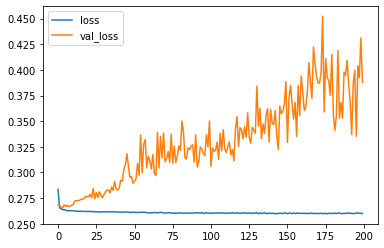

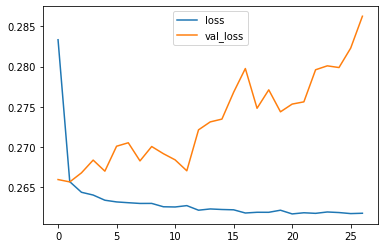

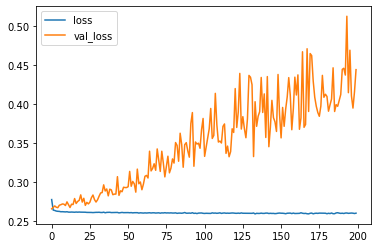

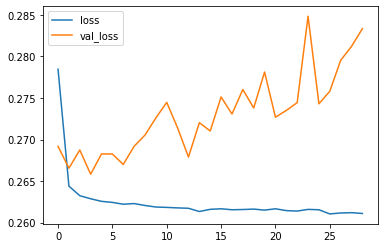

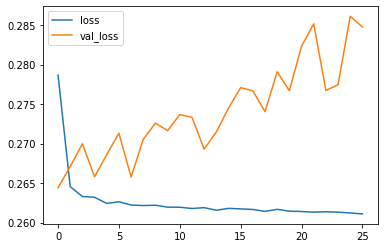

In [ ]:
for model_graph in model_loss:
    model_graph.plot()

In [ ]:
pd.set_option('display.max_colwidth', 120)  # Set global column width
print ('\nResults')
print('Data rows: ', len(X))
display (results_df)


Results
Data rows:  395219


,Model Name,EarlySt,Dropout,Epochs,Train Time,Accuracy,F1-Score
0,Med w/Dropout,None,0.5,200,2742.1 secs,0.803692,0.869347
1,Med w/Dropout & E.S.,25,0.5,200,375.8 secs,0.882698,0.930021
2,Lrg w/Dropout,None,0.5,200,3024.3 secs,0.783209,0.852489
3,Lrg w/Dropout & E.S.,25,0.5,200,452.2 secs,0.879751,0.927820
4,Lrg w/Dropout & Early S. low Ptce,5,0.5,200,401.2 secs,0.877271,0.926025


# The Winner Model

* It's time a choose a winner. 

The model trained with this parameters got a 93% F1-score:

        "model_name": "Med w/Dropout & E.S.",
        "nodes_layer1": 79,
        "nodes_layer2": 40,
        "dropout_rate": 0.5,
        "early_stop_patience": 25,
        "epochs": 200


In [ ]:
print('\n...And the winner is:\n')
max_index = results_df['F1-Score'].idxmax()
print('Model No.: ', max_index+1)
print(results_df.loc[max_index, ['Model Name', 'Accuracy','F1-Score']])


...And the winner is:

Model No.:  2
Model Name    Med w/Dropout & E.S.
Accuracy                  0.882698
F1-Score                  0.930021
Name: 1, dtype: object
